In [ ]:
!pip install --upgrade pip
!pip install fosforml numpy pandas matplotlib scikit-learn seaborn python-dateutil
!pip uninstall urllib3 -y
!pip install urllib3==1.26.15
!pip install fosforml 
!pip install fosforio
!pip install refractio
!pip install refractml

In [ ]:
!pip install seaborn scipy xgboost pandas dice-ml tabulate numpy scikit-learn pandas-profiling plotly matplotlib scipy statsmodels seaborn pydantic-settings

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, OneHotEncoder, OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
from scipy.stats.mstats import winsorize
from xgboost import XGBClassifier
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
import joblib
from fosforml import *
from fosforml.constants import MLModelFlavours
import warnings
warnings.filterwarnings("ignore", message="numpy.dtype size changed")
warnings.filterwarnings("ignore", message="numpy.ufunc size changed")

In [2]:
from refractio import snowflake
snowflake.get_connection(connection_name="HR_ANALYTICS_V")

Connection manager service url initialised to http://fdc-project-manager:80/project-manager
If you need to update its value then update the variable CONNECTION_MANAGER_BASE_URL in os env.
Exception occurred in getting snowflake connection: 'connectionSources'


In [3]:
df = snowflake.get_dataframe("HR_ANALYTICS_V")
df

,SALARY,SENIORITY,TENURE_MONTHS,MONTHS_AFTER_COLLEGE,BIRTH_YEAR,MAPPED_ROLE_CLEAN,SEX,ETHNICITY,HOSPITAL_TYPE,HOSPITAL_OWNERSHIP,...,CITY,STATE,DISTANCE,DEGREE_CLEAN,SCHOOL_ENDDATE,JOB_STARTDATE,JOB_ENDDATE,USER_ID,OVERTIME_HOURS,CHURN
0,53239.07,4,5,358,1965,nurse,M,White,Acute Care Hospitals,Voluntary non-profit - Private,...,Yakima,WA,>10 miles,Associates Degree,1987-01-01,2016-11-01,2017-06-01,147501806,13,1
1,29277.97,1,10,18,1993,nurse,F,Multiple,Acute Care Hospitals,Voluntary non-profit - Church,...,Tampa,FL,>10 miles,Undergraduate Diploma,2014-01-01,2015-07-01,2016-06-01,46143395,15,1
2,43763.54,2,20,6,1985,technologist,F,White,Acute Care Hospitals,Voluntary non-profit - Church,...,Columbus,OH,5-10 miles,Bachelors Degree,2010-01-31,2010-07-01,2012-05-01,567514867,0,1
3,24728.57,1,14,16,1992,nurse,M,White,Acute Care Hospitals,Proprietary,...,Miami,FL,>10 miles,Undergraduate Diploma,2013-01-31,2014-05-01,2015-09-01,65551252,9,0
4,46819.01,2,43,17,1983,technologist,M,White,Acute Care Hospitals,Voluntary non-profit - Private,...,Cleveland,OH,2-5 miles,Bachelors Degree,2008-01-01,2009-06-01,None,84119911,13,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299995,30934.15,1,2,8,1996,nurse,M,Multiple,Psychiatric,Voluntary non-profit - Private,...,Orlando,FL,>10 miles,Other,2019-01-31,2019-09-01,2020-02-01,163926894,2,1
299996,69288.47,2,7,63,1996,nurse,F,API,Acute Care Hospitals,Proprietary,...,Tyler,TX,>10 miles,Associates Degree,2014-01-31,2019-04-01,2020-02-01,313934824,3,1
299997,53051.71,1,10,11,1991,emt,F,Multiple,Acute Care Hospitals,Voluntary non-profit - Private,...,Phoenix,AZ,5-10 miles,Bachelors Degree,2018-01-01,2018-12-01,None,812455262,8,0
299998,72186.39,2,13,8,1995,technologist,F,Black,Acute Care Hospitals,Voluntary non-profit - Other,...,Chicago,IL,<2 miles,Bachelors Degree,2020-01-01,2020-09-01,None,713192325,9,0


In [4]:
print(df.isnull().sum())

SALARY                      0
SENIORITY                   0
TENURE_MONTHS               0
MONTHS_AFTER_COLLEGE        0
BIRTH_YEAR                  0
MAPPED_ROLE_CLEAN           0
SEX                         0
ETHNICITY                   0
HOSPITAL_TYPE               0
HOSPITAL_OWNERSHIP          0
COMPANY_NAME                0
CITY                        0
STATE                       0
DISTANCE                    0
DEGREE_CLEAN                0
SCHOOL_ENDDATE              0
JOB_STARTDATE               0
JOB_ENDDATE             90076
USER_ID                     0
OVERTIME_HOURS              0
CHURN                       0
dtype: int64


In [5]:
df = df.dropna()

In [6]:
print(df.isnull().sum())

SALARY                  0
SENIORITY               0
TENURE_MONTHS           0
MONTHS_AFTER_COLLEGE    0
BIRTH_YEAR              0
MAPPED_ROLE_CLEAN       0
SEX                     0
ETHNICITY               0
HOSPITAL_TYPE           0
HOSPITAL_OWNERSHIP      0
COMPANY_NAME            0
CITY                    0
STATE                   0
DISTANCE                0
DEGREE_CLEAN            0
SCHOOL_ENDDATE          0
JOB_STARTDATE           0
JOB_ENDDATE             0
USER_ID                 0
OVERTIME_HOURS          0
CHURN                   0
dtype: int64


In [8]:
df = df.drop(["USER_ID", "JOB_STARTDATE", "JOB_ENDDATE", "SCHOOL_ENDDATE"], axis = 1)

In [9]:
CATEGORICAL_COLUMNS = ["MAPPED_ROLE_CLEAN","SEX", "ETHNICITY","HOSPITAL_TYPE", "HOSPITAL_OWNERSHIP","COMPANY_NAME","CITY","STATE","DISTANCE", 
                       "DEGREE_CLEAN"]
NUMERICAL_COLUMNS = ["SALARY", "SENIORITY", "TENURE_MONTHS", "MONTHS_AFTER_COLLEGE", "BIRTH_YEAR",]
LABEL_COLUMNS = ["CHURN"]
OUTPUT_COLUMNS = ["PREDICTION"]

In [10]:
# Filter feature columns
feature_columns = CATEGORICAL_COLUMNS + NUMERICAL_COLUMNS
feature_columns = [col for col in feature_columns if col in df.columns]
LABEL_COLUMNS = [col for col in LABEL_COLUMNS if col in df.columns]
 
# Split data into features and labels
X = df[feature_columns]
y = df[LABEL_COLUMNS].values.ravel()  # Flatten to 1D array for consistency

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [13]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OrdinalEncoder, MinMaxScaler
from xgboost import XGBClassifier
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
 
# Define transformers
categorical_transformer = make_pipeline(
    SimpleImputer(strategy='constant', fill_value='missing'),
    OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
)
 
numerical_transformer = make_pipeline(
    SimpleImputer(strategy='mean'),
    MinMaxScaler(clip=True)
)
 
# Create preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, CATEGORICAL_COLUMNS),
        ('num', numerical_transformer, NUMERICAL_COLUMNS)
    ]
)
 
# Create pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', XGBClassifier())
])

In [14]:
pipeline.fit(X_train, y_train)

result = pipeline.predict(X_test)

In [15]:
result

array([1, 0, 0, ..., 1, 0, 0])

In [16]:
from joblib import dump, load
filename = "HR_Attrition_Analysis_17_07_2024.joblib"
dump(pipeline, filename)

['HR_Attrition_Analysis_17_07_2024.joblib']

In [17]:
y_pred = pipeline.predict(X_test)
y_prob = pipeline.predict_proba(X_test)

In [18]:
from refractml import *

from refractml.constants import MLModelFlavours

/tmp/pip_packages/_distutils_hack/__init__.py:32: UserWarning: Setuptools is replacing distutils. Support for replacing an already imported distutils is deprecated. In the future, this condition will fail. Register concerns at https://github.com/pypa/setuptools/issues/new?template=distutils-deprecation.yml
  warnings.warn(


In [19]:
@scoring_func
def score(model, request):
    payload_dict = request.json["payload"]
    data_json = eval(payload)
    data = pd.DataFrame([data_json])
    prediction = str(model.predict(data)[0])
    return prediction

In [20]:
import requests
payload = str(X_test.iloc[123].to_dict())
req = requests.Request()
req.json = {"payload": payload}

print(score(pipeline, req))

1


In [21]:
req.json

{'payload': "{'MAPPED_ROLE_CLEAN': 'nurse', 'SEX': 'M', 'ETHNICITY': 'Black', 'HOSPITAL_TYPE': 'Acute Care Hospitals', 'HOSPITAL_OWNERSHIP': 'Government - Hospital District or Authority', 'COMPANY_NAME': 'SSM Health Care Corp.', 'CITY': 'Madison', 'STATE': 'WI', 'DISTANCE': '>10 miles', 'DEGREE_CLEAN': 'Professional Certificate', 'SALARY': 57183.9, 'SENIORITY': 1, 'TENURE_MONTHS': 1, 'MONTHS_AFTER_COLLEGE': 38, 'BIRTH_YEAR': 1990}"}

In [24]:
## registering the model in refract.
tmp = register_model(pipeline, 
               score, 
               name="HumanResource_Attrition_ml_model", 
               description="HumanResource_Attrition_model_trained_using _ml",
               flavour=MLModelFlavours.sklearn,
               model_type="classification",
               init_script="\\n pip install fosforml \\n pip install seaborn \\n pip install snowflake-connector-python[pandas] \\n pip install joblib==1.3.2 scikit-learn=1.3.2",
               y_true=y_test,
               y_pred=y_pred, 
               features=X_train.columns,
               labels=[0,1],
               input_type="json", 
               explain_ai=True,
               prob=y_prob,
               x_train=X_train, 
               x_test=X_test, 
               y_train=y_train,
               y_test=y_test,
               feature_names=X_train.columns.tolist(),
               original_features=X_train.columns.tolist(),
               feature_ids=X_train.columns,
               target_names=['NOT LEFT','LEFT'],
               kyd=True, kyd_score = True)


Calculating build time metrics

Progress: ██████████████████████████████████████████████████████████████████████ 100.0%


In [23]:
payload  = {"payload": X_test.iloc[0].to_dict()}
payload

{'payload': {'MAPPED_ROLE_CLEAN': 'nurse',
  'SEX': 'F',
  'ETHNICITY': 'API',
  'HOSPITAL_TYPE': 'Acute Care Hospitals',
  'HOSPITAL_OWNERSHIP': 'Government - Local',
  'COMPANY_NAME': 'Adventist Health System Sunbelt Healthcare Corp.',
  'CITY': 'Deltona',
  'STATE': 'FL',
  'DISTANCE': '<2 miles',
  'DEGREE_CLEAN': 'Associates Degree',
  'SALARY': 83361.28,
  'SENIORITY': 3,
  'TENURE_MONTHS': 1,
  'MONTHS_AFTER_COLLEGE': 82,
  'BIRTH_YEAR': 1992}}

In [26]:
headers={"Content-type":"application/json"}
url = "http://svc-1f15627b-8eb6-48d3-b58c-3677514af291:5001/humanresourceattritionmlmodel/f0acb182-64a2-4f2c-bd03-221a994b0641/score"
data={"payload": payload}
response = requests.post(url, json=data, headers=headers) 
response.json()

{'data': '1', 'request_id': '68f47338-bd2f-465f-ab00-1728d100854d'}

In [27]:
result = pipeline.predict(X_test)
result_prob = pipeline.predict_proba(X_test)
pred_df = X_test.copy()
result = result
result_prob = result_prob
pred_df["PREDICTION"] = result
pred_df["PROB"] = result_prob[:, 1]

In [28]:
from sklearn.metrics import classification_report, log_loss, roc_auc_score
 
# Check lengths
print("Length of y_test:", len(y_test))
print("Length of y_pred:", len(y_pred))
 
# Print classification report
print(classification_report(y_test, y_pred))
 
# Calculate accuracy
accuracy = sum(y_test == y_pred) / len(y_test)
print("Accuracy:", accuracy)
 
# Calculate additional metrics
log_loss_value = log_loss(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob[:, 1])  # Assuming class 1 is the positive class
 
print("Log Loss:", log_loss_value)
print("ROC AUC Score:", roc_auc)

Length of y_test: 41985
Length of y_pred: 41985
              precision    recall  f1-score   support

           0       0.86      0.91      0.88     23996
           1       0.87      0.79      0.83     17989

    accuracy                           0.86     41985
   macro avg       0.86      0.85      0.86     41985
weighted avg       0.86      0.86      0.86     41985

Accuracy: 0.8599023460759795
Log Loss: 0.279316354540602
ROC AUC Score: 0.9455752399891801


In [31]:
## scores
from sklearn.metrics import classification_report, log_loss, roc_auc_score
y_test = [1 if i is True else 0 for i in y_test["CHURN"]]
y_pred = [int(i) for i in pred_df["PREDICTION"]]
print(classification_report(y_test, y_pred))

accuracy = sum([1 if y_test[i] == y_pred[i] else 0 for i in range(len(y_test))]) / len(y_test)
print("accuracy: ", accuracy )

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [32]:
log_loss(y_test,pred_df["PROB"] )

0.279316354540602

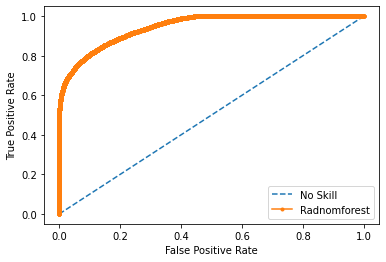

In [33]:
from sklearn.metrics import roc_curve, precision_recall_curve, confusion_matrix
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot as plt
import seaborn as sns
ns_probs = [0 for _ in range(len(y_test))]
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, pred_df["PROB"])
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, pred_df["PROB"])
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Radnomforest')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

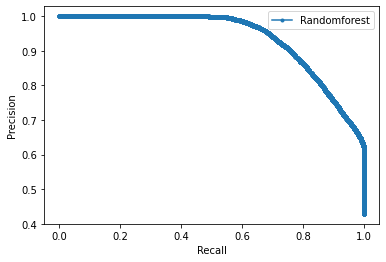

In [34]:
lr_precision, lr_recall, _ = precision_recall_curve(y_test, pred_df["PROB"])
plt.plot(lr_recall, lr_precision, marker='.', label='Randomforest')
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
# show the legend
plt.legend()
# show the plot
plt.show()

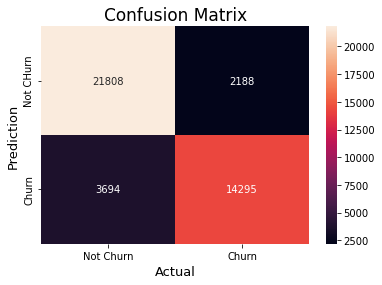

In [35]:
cm = confusion_matrix(y_test,y_pred)
 
#Plot the confusion matrix.
sns.heatmap(cm,
            annot=True,
            fmt='g',
            xticklabels=['Not Churn','Churn'],
            yticklabels=['Not CHurn','Churn'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

In [36]:
scores_data = pd.DataFrame({"ns_probs":ns_probs,
                            "y_test":y_test,
                            "y_pred":pred_df["PREDICTION"],
                            "act_probs":pred_df["PROB"]})

In [37]:
scores_data

,ns_probs,y_test,y_pred,act_probs
264704,0,1,1,0.992868
141067,0,0,0,0.250705
233845,0,0,0,0.280657
95319,0,1,1,0.759533
88209,0,0,0,0.000023
...,...,...,...,...
226685,0,0,0,0.004522
14164,0,0,0,0.284166
93709,0,1,1,0.903334
251932,0,1,0,0.376338


In [38]:
scores_data.to_csv("/data/scores_17_7.csv", index=False)